In [61]:
import pandas as pd

# Creating dummy data for Netflix user engagement
data = {
    'User_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Age': [25, 34, 28, 45, 36, 33, 41, 23, 38, 29],
    'Watch_Time_Minutes': [210, 150, 320, 400, 180, 220, 300, 270, 350, 230],
    'Genre': ['Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama'],
    'Year': ['2019', '2020', '2021', '2022', '2023', '2024', '2025', '2019', '2020', '2021'],  
    'Subscriptions_Millions': [8.76, 167, 204, 230.75, 5400, 280, 302, 8.76, 167, 204]  # Adjusted numbers based on past trends
}

# Creating a pandas dataframe
df = pd.DataFrame(data)

# Saving it as a CSV
df.to_csv('dummy_netflix_data.csv', index=False)

print(df)

   User_ID  Age  Watch_Time_Minutes   Genre  Year  Subscriptions_Millions
0      101   25                 210   Drama  2019                    8.76
1      102   34                 150  Comedy  2020                  167.00
2      103   28                 320  Action  2021                  204.00
3      104   45                 400   Drama  2022                  230.75
4      105   36                 180  Comedy  2023                 5400.00
5      106   33                 220  Action  2024                  280.00
6      107   41                 300   Drama  2025                  302.00
7      108   23                 270  Comedy  2019                    8.76
8      109   38                 350  Action  2020                  167.00
9      110   29                 230   Drama  2021                  204.00


**Step 1: Import Libraries**

In [62]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

**Step 2: Generate Sample Data**

In [63]:
# Load the dummy data
df = pd.read_csv('dummy_netflix_data.csv')

# Show the first few rows of your data
print(df.head())

   User_ID  Age  Watch_Time_Minutes   Genre  Year  Subscriptions_Millions
0      101   25                 210   Drama  2019                    8.76
1      102   34                 150  Comedy  2020                  167.00
2      103   28                 320  Action  2021                  204.00
3      104   45                 400   Drama  2022                  230.75
4      105   36                 180  Comedy  2023                 5400.00


**Step 3: Checking Missing Values**

In [64]:
# Checking the Data
print("Checking for missing values:")
print(df.isnull().sum())  # Check for missing values in the dataset

print("\nChecking data types:")
print(df.dtypes)  # Check the data types of each column


Checking for missing values:
User_ID                   0
Age                       0
Watch_Time_Minutes        0
Genre                     0
Year                      0
Subscriptions_Millions    0
dtype: int64

Checking data types:
User_ID                     int64
Age                         int64
Watch_Time_Minutes          int64
Genre                      object
Year                        int64
Subscriptions_Millions    float64
dtype: object


**Step 4: Exploratory Data Analysis (EDA)Simultaneous Marginal Confidence Sequences**

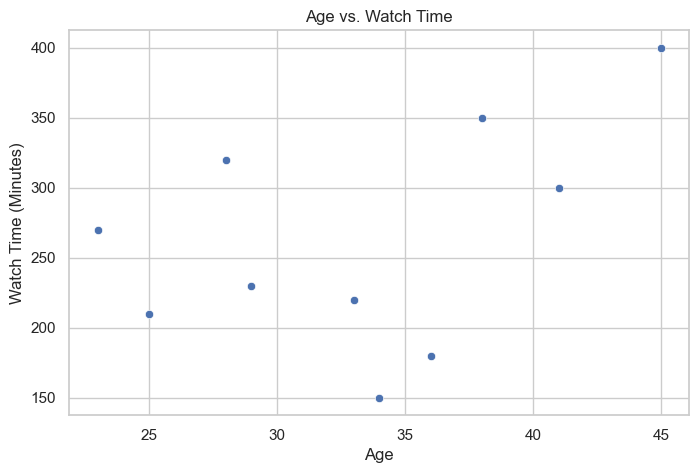

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Age vs. Watch Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Watch_Time_Minutes'])
plt.xlabel("Age")
plt.ylabel("Watch Time (Minutes)")
plt.title("Age vs. Watch Time")
plt.show()


/var/folders/hj/7581rlt53kg9qp2n9c6123mr0000gn/T/ipykernel_20163/3068686596.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/var/folders/hj/7581rlt53kg9qp2n9c6123mr0000gn/T/ipykernel_20163/3068686596.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x="Genre", y="Watch_Time_Minutes", data=df, estimator=np.mean, ci="sd", palette=colors, width=0.6)
/var/folders/hj/7581rlt53kg9qp2n9c6123mr0000gn/T/ipykernel_20163/3068686596.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to s

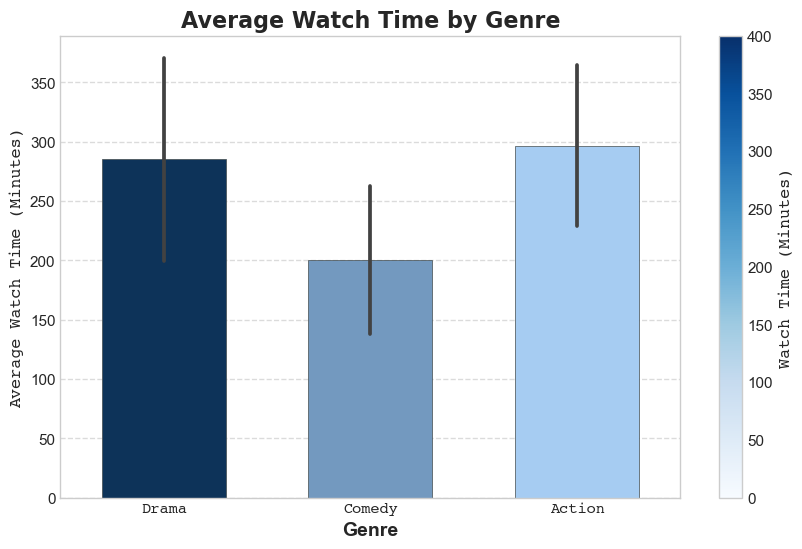

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

# Define a custom color palette (dark blue, gray blue, light blue)
colors = ['#003366', '#6699CC', '#99CCFF']

# Create the bar plot with custom colors
ax = sns.barplot(x="Genre", y="Watch_Time_Minutes", data=df, estimator=np.mean, ci="sd", palette=colors, width=0.6)

# Add borders around the bars by looping through each rectangle in the plot
for bar in ax.patches:
    bar.set_edgecolor('#414a4c')  # Set the edge color
    bar.set_linewidth(0.5)  # Set the thickness of the border

# Add labels and title with Times New Roman font
plt.xlabel("Genre", fontsize=14, fontname="Arial", fontweight="bold")
plt.ylabel("Average Watch Time (Minutes)", fontsize=12, fontname="courier")
plt.title("Average Watch Time by Genre", fontsize=16, fontname="DejaVu Sans", fontweight="bold")

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0, fontname="courier")

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a color legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=df["Watch_Time_Minutes"].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("Watch Time (Minutes)", fontname="courier", fontsize=12)

# Show the plot
plt.show()

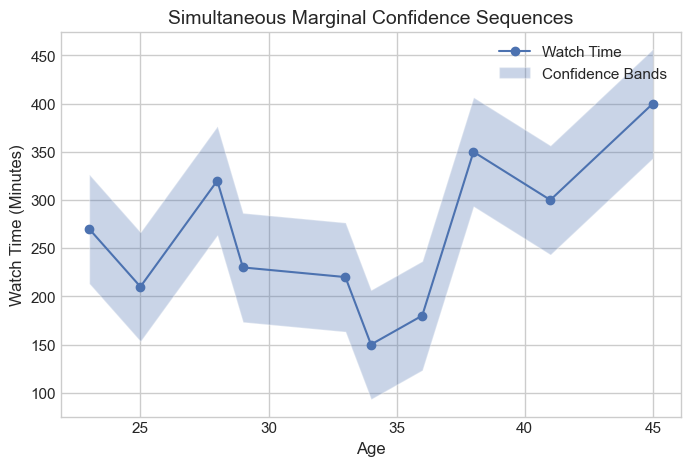

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sorting data by Age
df = df.sort_values(by="Age")

# Defining x (Age) and y (Watch Time)
x = df['Age']
y = df['Watch_Time_Minutes']

# Calculating confidence interval
confidence = 0.95  # 95% confidence level
mean = np.mean(y)
std_err = stats.sem(y)  # Standard error of the mean
margin = std_err * stats.t.ppf((1 + confidence) / 2., len(y)-1)

# Defining upper and lower bounds
lower_bound = y - margin
upper_bound = y + margin

# Plotting the data with confidence bands
plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', linestyle='-', label='Watch Time')
plt.fill_between(x, lower_bound, upper_bound, alpha=0.3, label='Confidence Bands')
plt.title('Simultaneous Marginal Confidence Sequences', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Watch Time (Minutes)', fontsize=12)
plt.legend()
plt.show()

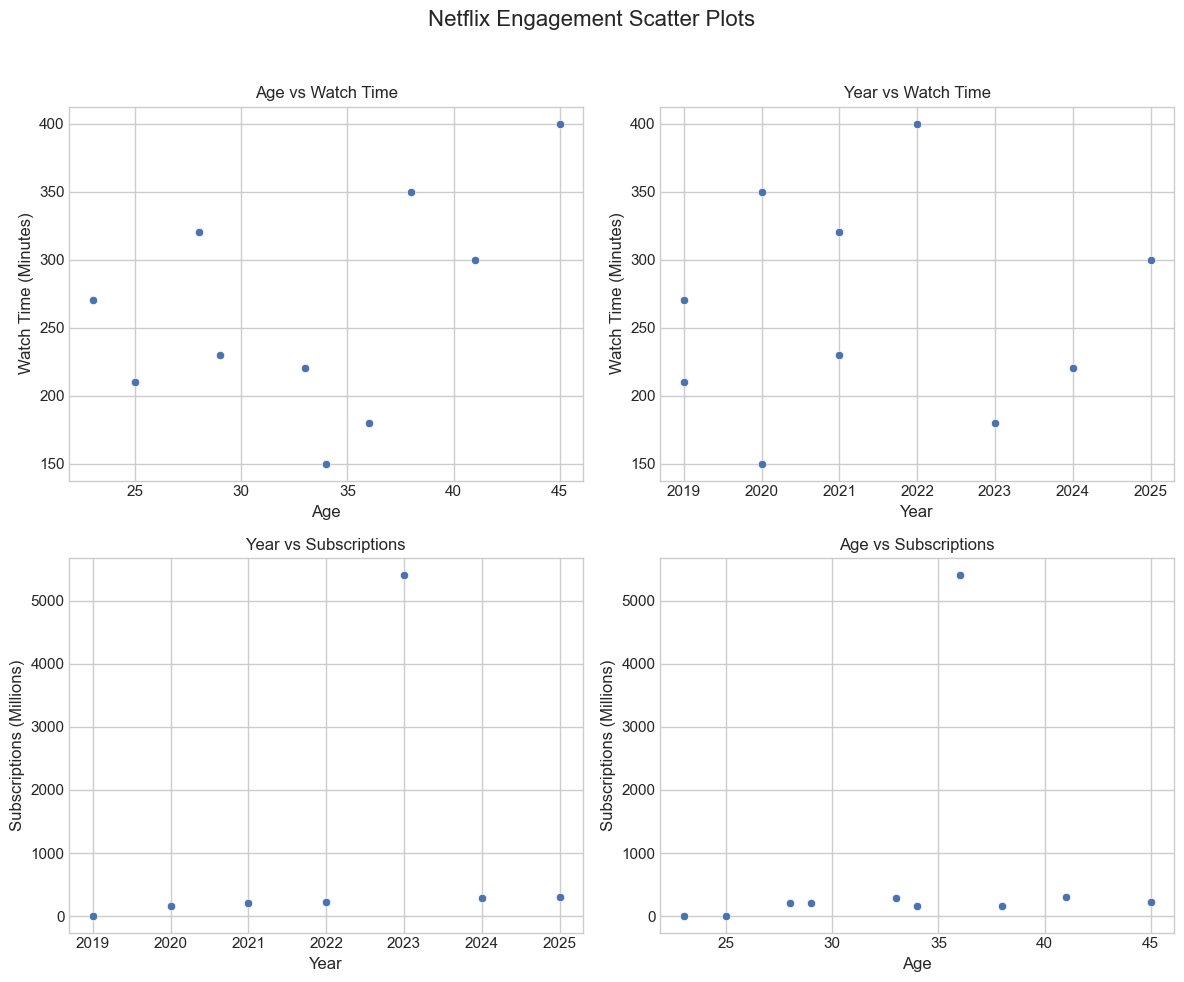

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating dummy data for Netflix user engagement
data = {
    'User_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Age': [25, 34, 28, 45, 36, 33, 41, 23, 38, 29],
    'Watch_Time_Minutes': [210, 150, 320, 400, 180, 220, 300, 270, 350, 230],
    'Genre': ['Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 'Action', 'Drama'],
    'Year': [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2019, 2020, 2021],  
    'Subscriptions_Millions': [8.76, 167, 204, 230.75, 5400, 280, 302, 8.76, 167, 204]  
}

# Creating a pandas dataframe
df = pd.DataFrame(data)

# Setting up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Netflix Engagement Scatter Plots", fontsize=16)

# Scatter plot 1: Age vs Watch Time
sns.scatterplot(ax=axes[0, 0], x=df['Age'], y=df['Watch_Time_Minutes'])
axes[0, 0].set_title("Age vs Watch Time")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Watch Time (Minutes)")

# Scatter plot 2: Year vs Watch Time
sns.scatterplot(ax=axes[0, 1], x=df['Year'], y=df['Watch_Time_Minutes'])
axes[0, 1].set_title("Year vs Watch Time")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Watch Time (Minutes)")

# Scatter plot 3: Year vs Subscriptions
sns.scatterplot(ax=axes[1, 0], x=df['Year'], y=df['Subscriptions_Millions'])
axes[1, 0].set_title("Year vs Subscriptions")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Subscriptions (Millions)")

# Scatter plot 4: Age vs Subscriptions
sns.scatterplot(ax=axes[1, 1], x=df['Age'], y=df['Subscriptions_Millions'])
axes[1, 1].set_title("Age vs Subscriptions")
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("Subscriptions (Millions)")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


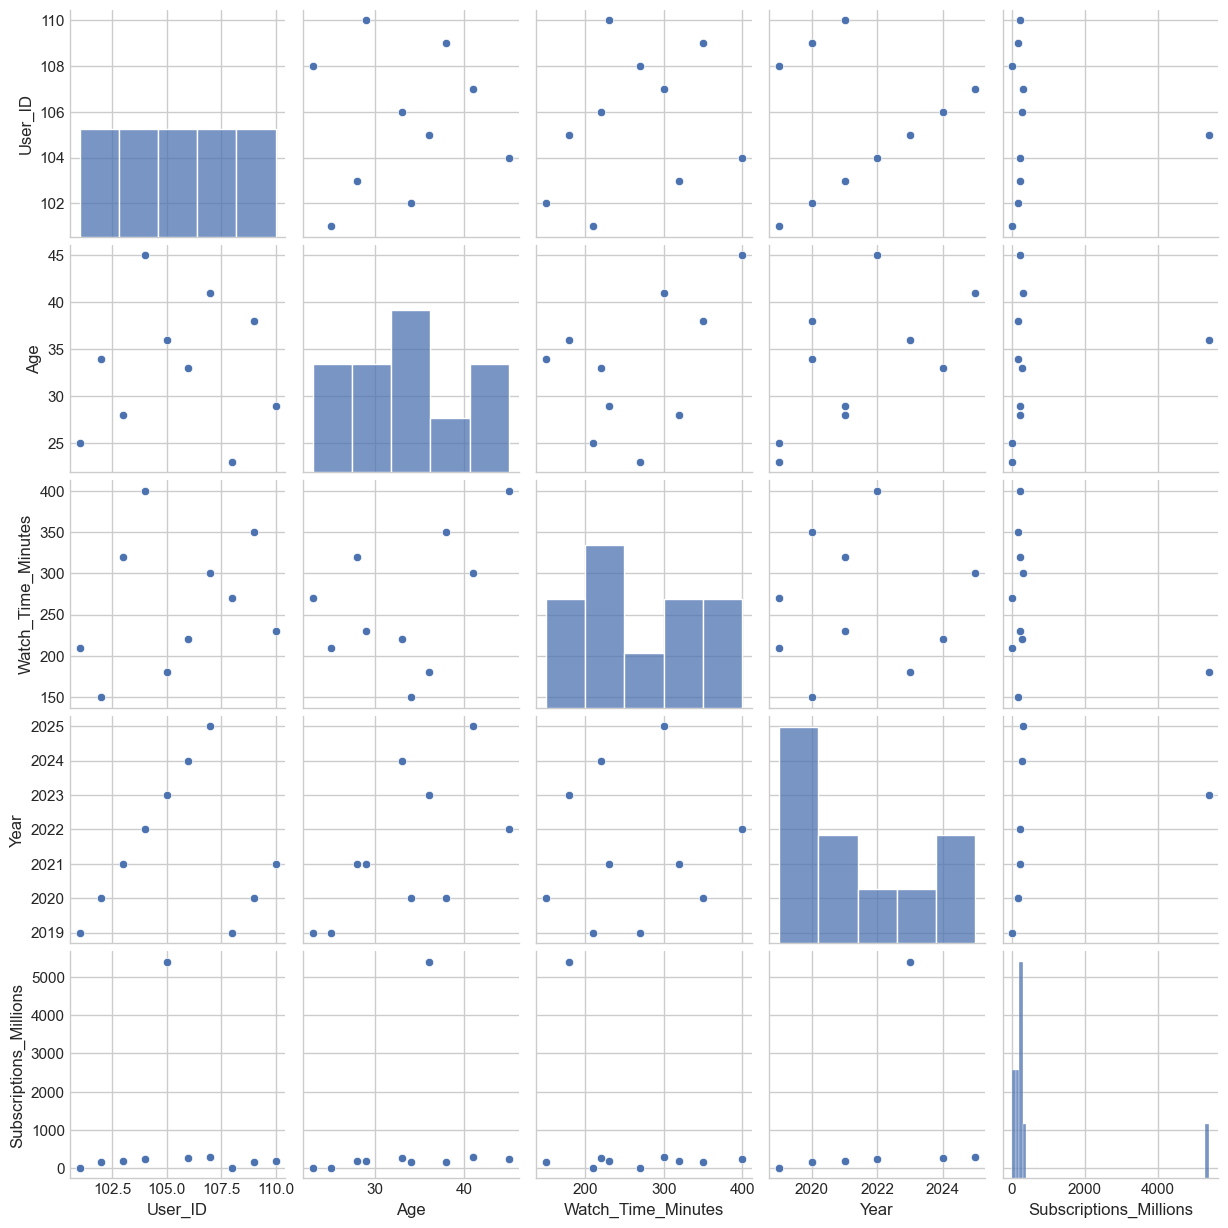

In [69]:
sns.pairplot(df)